<a href="https://colab.research.google.com/github/bejoy1775/breast-cancer-model/blob/main/BreastCancerV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries

In [ ]:
# Import Required Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import dataset with following conditions
*   Provide proper columns
*   Certain rows have special characters '?'. Treat them as null during import
*   Ignore first column which is just a sample id

In [ ]:
# from typing_extensions import Literal
# Read Files
diagnostic=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                       header=None,
                       names=['sample',
                              'clumpThickness',
                              'cellSizeUniformity',
                              'cellShapeUniformity',
                              'marginalAdhesion',
                              'singleCellSize',
                              'bareNuclei',
                              'blandChrooomatin',
                              'normalNucleoli',
                              'mitoses',
                              'class'],
                       na_values=['?'],usecols=[1,2,3,4,5,6,7,8,9,10]
                       )

# Data Visualizations and Preprocessing

Using pandas to understand the data and properties of the attributes

In [ ]:
diagnostic.head()

,clumpThickness,cellSizeUniformity,cellShapeUniformity,marginalAdhesion,singleCellSize,bareNuclei,blandChrooomatin,normalNucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
diagnostic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clumpThickness       699 non-null    int64  
 1   cellSizeUniformity   699 non-null    int64  
 2   cellShapeUniformity  699 non-null    int64  
 3   marginalAdhesion     699 non-null    int64  
 4   singleCellSize       699 non-null    int64  
 5   bareNuclei           683 non-null    float64
 6   blandChrooomatin     699 non-null    int64  
 7   normalNucleoli       699 non-null    int64  
 8   mitoses              699 non-null    int64  
 9   class                699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


Remove rows that are carrying null attributes. We see that out of 699 rows, 13 rows have null attributes

In [ ]:
diagnostic_removenull =  diagnostic.dropna(axis=0)

In [ ]:
diagnostic_removenull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clumpThickness       683 non-null    int64  
 1   cellSizeUniformity   683 non-null    int64  
 2   cellShapeUniformity  683 non-null    int64  
 3   marginalAdhesion     683 non-null    int64  
 4   singleCellSize       683 non-null    int64  
 5   bareNuclei           683 non-null    float64
 6   blandChrooomatin     683 non-null    int64  
 7   normalNucleoli       683 non-null    int64  
 8   mitoses              683 non-null    int64  
 9   class                683 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 58.7 KB


Certain columns are of dtype float. For consistency, cast all column to dtype int64

In [ ]:
diagnostic_dtyped = diagnostic_removenull.astype('int64')

Analyze for correlation between attributes
* We see that cellSizeUniformity and cellShapeUniformity have a high correlation
* In general most of the attributes are reasonably correlated with each other

In [ ]:
diagnostic_dtyped.corr()

,clumpThickness,cellSizeUniformity,cellShapeUniformity,marginalAdhesion,singleCellSize,bareNuclei,blandChrooomatin,normalNucleoli,mitoses,class
clumpThickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
cellSizeUniformity,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
cellShapeUniformity,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginalAdhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
singleCellSize,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bareNuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
blandChrooomatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normalNucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


We see that the dependent feature called "class" is binary in nature but contains value 2 and 4 to represent (2 for benign, 4 for malignant). As part of cleanup we will convert to binary values 0 and 1

In [ ]:
diagnostic_dtyped["class"].value_counts()

2    444
4    239
Name: class, dtype: int64

In [ ]:
diagnostic_final = diagnostic_dtyped.replace({'class':{2:0,4:1}})
diagnostic_final["class"].value_counts()

0    444
1    239
Name: class, dtype: int64

Histograms for data visualization for all features. One key call out here

All the features are already in the same scale of 1 to 10 (ignoring label "class"). Hence we don't have to do any specific "normalization" or "standardization" as part of preprocessing. We will revisit this step if we see an issue with modelling later




array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

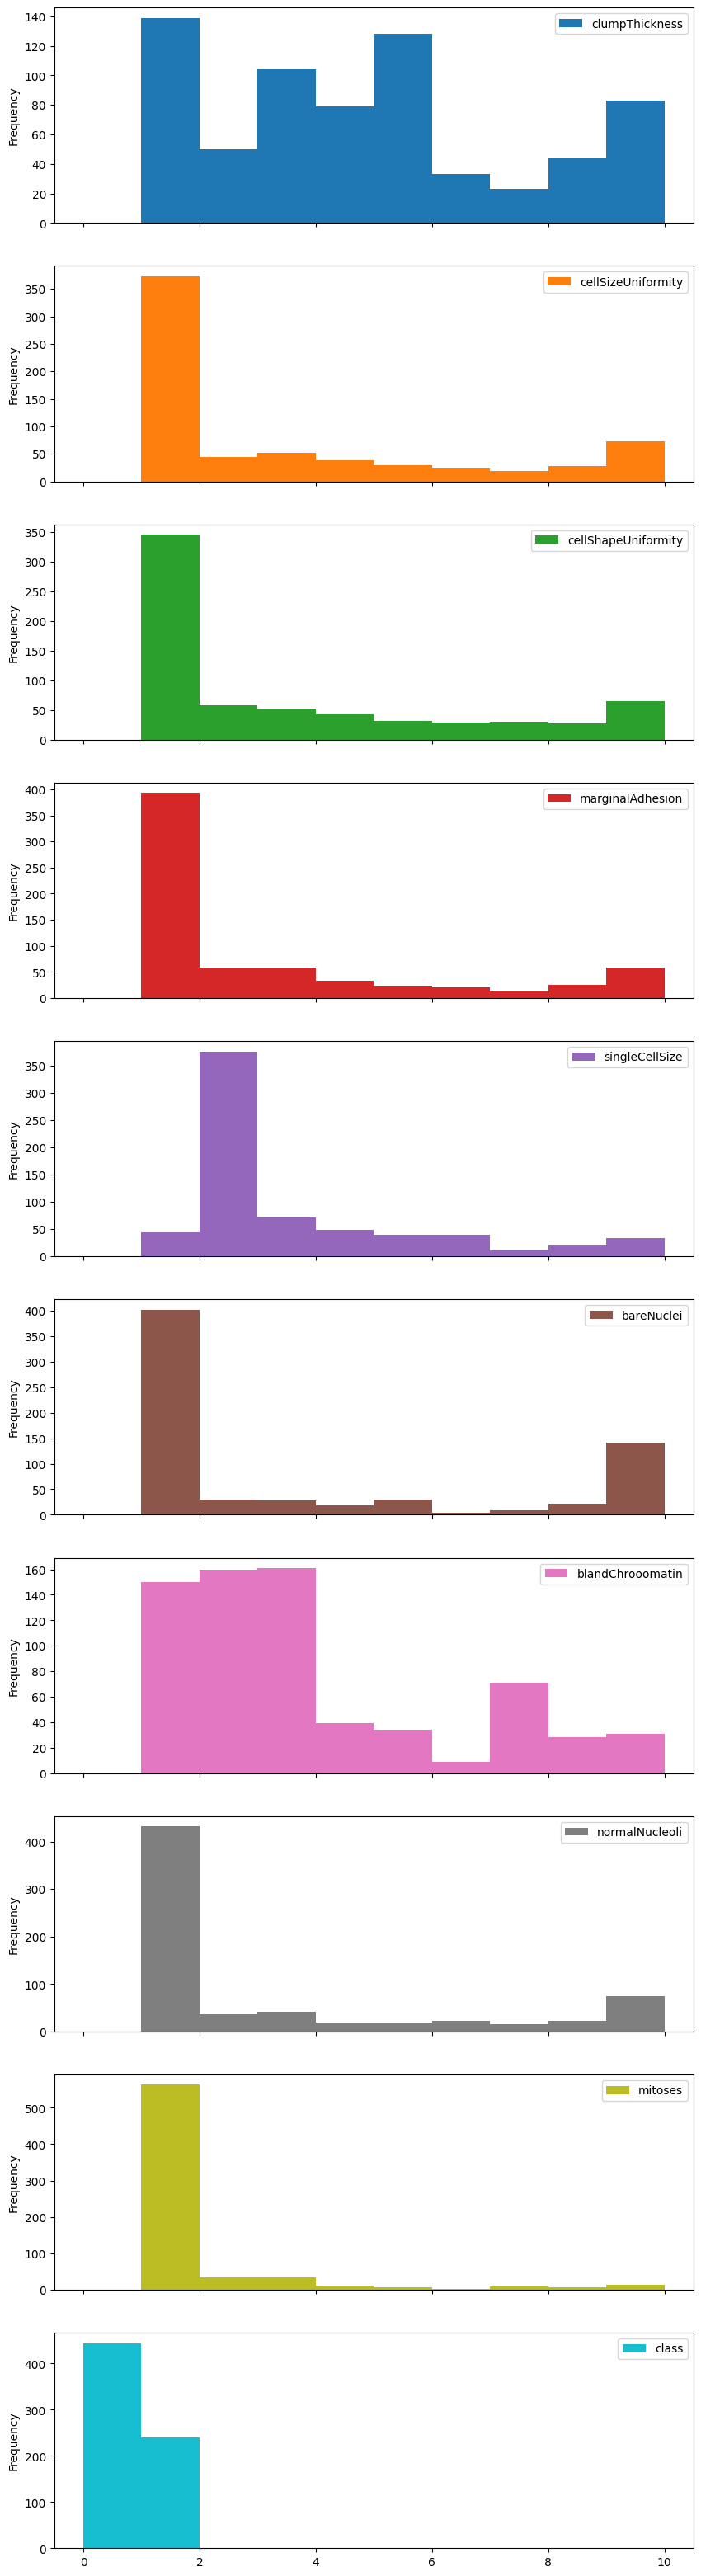

In [ ]:
diagnostic_final.plot(kind="hist",subplots=True,figsize=(10,40))

# Model Creation

  Create X & y values (features and labels)

In [ ]:
X = diagnostic_final.drop("class", axis=1)
y = diagnostic_final["class"]

Creating training and test sets with 90% for training and 10 % for test. Use random for splitting but seed it as 42 to maintain repetability

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 614 entries, 83 to 104
Series name: class
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


# Build a neural network

In [ ]:
from tensorflow.python.ops.gen_nn_ops import bias_add
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[9,]),
    tf.keras.layers.Dense(14, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 2s 23ms/step - loss: 1.0006 - binary_accuracy: 0.6596 - false_negatives_12: 209.0000 - true_negatives_13: 405.0000 - false_positives_12: 0.0000e+00 - true_positives_12: 0.0000e+00 - precision_6: 0.0000e+00 - recall_4: 0.0000e+00 - val_loss: 0.8610 - val_binary_accuracy: 0.5652 - val_false_negatives_12: 30.0000 - val_true_negatives_13: 39.0000 - val_false_positives_12: 0.0000e+00 - val_true_positives_12: 0.0000e+00 - val_precision_6: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7421 - binary_accuracy: 0.6580 - false_negatives_12: 201.0000 - true_negatives_13: 396.0000 - false_positives_12: 9.0000 - true_positives_12: 8.0000 - precision_6: 0.4706 - recall_4: 0.0383 - val_loss: 0.7241 - val_binary_accuracy: 0.6087 - val_false_negatives_12: 25.0000 - val_true_negatives_13: 37.0000 - val_false_positives_12: 2.0000 - val_true_positives_12: 5.0000 - val_precision_6: 0.7143 

In [ ]:
pd.DataFrame(history.history)

,loss,binary_accuracy,false_negatives_12,true_negatives_13,false_positives_12,true_positives_12,precision_6,recall_4,val_loss,val_binary_accuracy,val_false_negatives_12,val_true_negatives_13,val_false_positives_12,val_true_positives_12,val_precision_6,val_recall_4
0,1.000643,0.659609,209.0,405.0,0.0,0.0,0.000000,0.000000,0.861018,0.565217,30.0,39.0,0.0,0.0,0.000000,0.000000
1,0.742120,0.657980,201.0,396.0,9.0,8.0,0.470588,0.038278,0.724070,0.608696,25.0,37.0,2.0,5.0,0.714286,0.166667
2,0.675663,0.710098,101.0,328.0,77.0,108.0,0.583784,0.516746,0.650174,0.782609,11.0,35.0,4.0,19.0,0.826087,0.633333
3,0.623799,0.773616,58.0,324.0,81.0,151.0,0.650862,0.722488,0.590376,0.826087,10.0,37.0,2.0,20.0,0.909091,0.666667
4,0.569260,0.850163,41.0,354.0,51.0,168.0,0.767123,0.803828,0.518383,0.913043,4.0,37.0,2.0,26.0,0.928571,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.069495,0.975570,6.0,396.0,9.0,203.0,0.957547,0.971292,0.084284,0.956522,3.0,39.0,0.0,27.0,1.000000,0.900000
96,0.070876,0.975570,4.0,394.0,11.0,205.0,0.949074,0.980861,0.102136,0.956522,3.0,39.0,0.0,27.0,1.000000,0.900000
97,0.067638,0.973941,5.0,394.0,11.0,204.0,0.948837,0.976077,0.104045,0.956522,3.0,39.0,0.0,27.0,1.000000,0.900000
98,0.068609,0.975570,5.0,395.0,10.0,204.0,0.953271,0.976077,0.099076,0.956522,3.0,39.0,0.0,27.0,1.000000,0.900000


# Model Architecture

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 14)                140       
                                                                 
 dense_38 (Dense)            (None, 10)                150       
                                                                 
 dense_39 (Dense)            (None, 1)                 11        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#  Training progress by epochs

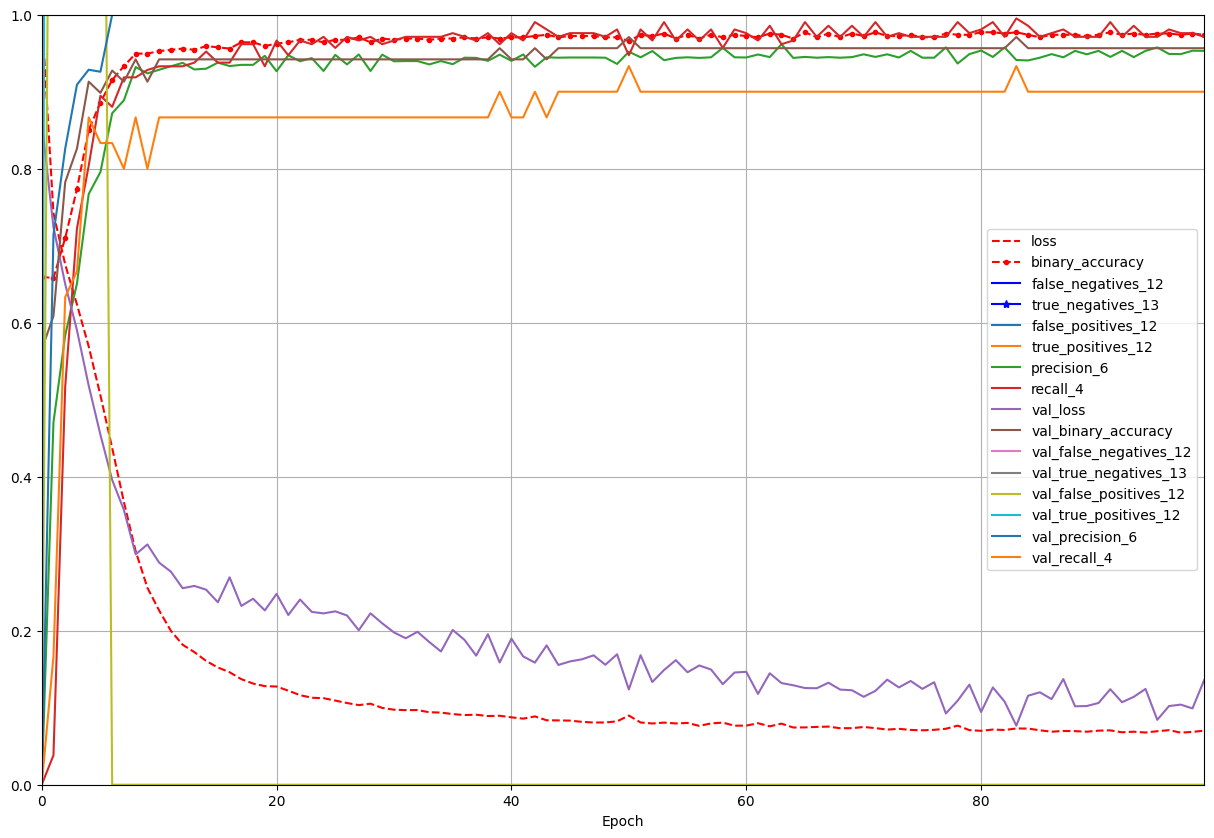

In [ ]:
pd.DataFrame(history.history).plot(
    figsize=(15, 10), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
    )
plt.show()

# Results

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

3/3 [==============================] - 0s 3ms/step


array([[39,  0],
       [ 3, 27]])

In [ ]:
from sklearn.metrics import accuracy_score
y_preds = model.predict(X_test)

accuracy_score(y_test, tf.round(y_preds))


3/3 [==============================] - 0s 3ms/step


0.9565217391304348

Accuracy, Precision/Recall, F1-Score

In [ ]:
loss, binary_accuracy,  false_negatives, true_negatives, false_positives,  true_positives, precision, recall =   model.evaluate(X_test, y_test)

print(f"Accuracy : {binary_accuracy}" )
print(f"Precision : {precision}" )
print(f"Recall : {recall}" )
print(f"F1-Score : {2 * precision * recall / (precision + recall)}" )

3/3 [==============================] - 0s 6ms/step - loss: 0.1361 - binary_accuracy: 0.9565 - false_negatives_12: 3.0000 - true_negatives_13: 39.0000 - false_positives_12: 0.0000e+00 - true_positives_12: 27.0000 - precision_6: 1.0000 - recall_4: 0.9000
Accuracy : 0.95652174949646
Precision : 1.0
Recall : 0.8999999761581421
F1-Score : 0.9473684078438459


# Total Parameters Used

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 14)                140       
                                                                 
 dense_28 (Dense)            (None, 10)                150       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
